In [64]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
digits=datasets.load_digits()

In [26]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

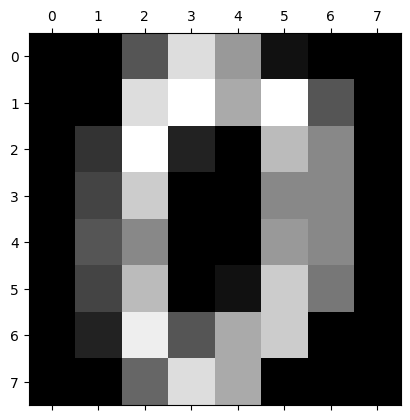

In [35]:
plt.matshow(digits.images[0])

In [37]:
df=pd.DataFrame(digits.data)

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [40]:
df["target"]=digits.target

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.33,random_state=42)

In [46]:
len(X_train)

1203

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
classifier=RandomForestClassifier()

In [50]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
classifier.score(X_test,y_test)

0.9713804713804713

In [54]:
y_pred=classifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [58]:
score=accuracy_score(y_pred,y_test)

In [59]:
print(score)

0.9713804713804713


In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.93      0.96        59
           2       1.00      1.00      1.00        52
           3       0.95      0.98      0.96        54
           4       1.00      0.97      0.98        66
           5       0.95      0.96      0.95        72
           6       0.98      0.98      0.98        57
           7       0.98      0.97      0.98        63
           8       0.94      0.96      0.95        51
           9       0.94      0.97      0.96        66

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



<Axes: >

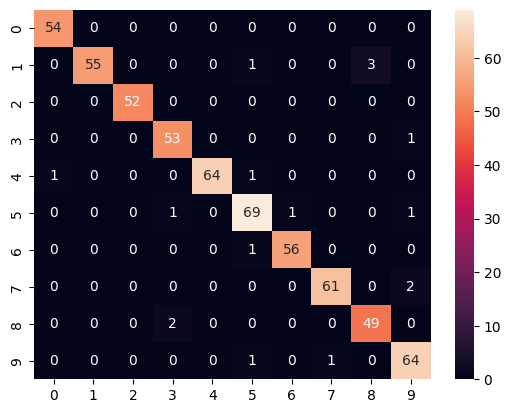

In [68]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)